In [67]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
data = pd.read_csv('/Users/giuliaocchini/Downloads/data.tsv', sep='\t')

In [92]:
less_than_10k =  data[data['Number of speakers (rounded)'] == '<10K']

In [93]:
glottocodes = less_than_10k['Glottocode (Glottolog)'].tolist()

In [81]:
glottolog_data = pd.read_csv('/Users/giuliaocchini/Downloads/languages_and_dialects_geo.csv')

In [37]:
df= glottolog_data[glottolog_data['glottocode'].isin(glottocodes)]

In [43]:
df = df.dropna(subset = ['latitude', 'longitude'])

In [41]:
missing_values = [x for x in glottocodes if x not in glottolog_data['glottocode'].values]

In [42]:
missing_values

['comm1246', 'slav1253', nan, 'haid1248', 'inup1234']

In [83]:
lang_coordinates = df[['name','glottocode','level','latitude', 'longitude']]

In [84]:
points = lang_coordinates.apply(lambda r: Point(r.longitude, r.latitude), axis=1)
gdb = geopandas.GeoDataFrame(lang_coordinates.assign(geometry=points), \
                        crs={'init' :'epsg:4326'})
xys = gdb['geometry'].apply(lambda pt: pd.Series({'x': pt.x, 'y': pt.y}))

/Users/giuliaocchini/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [87]:
gdb['x'] = xys['x']
gdb['y'] = xys['y']

In [88]:
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_44366/867032107.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


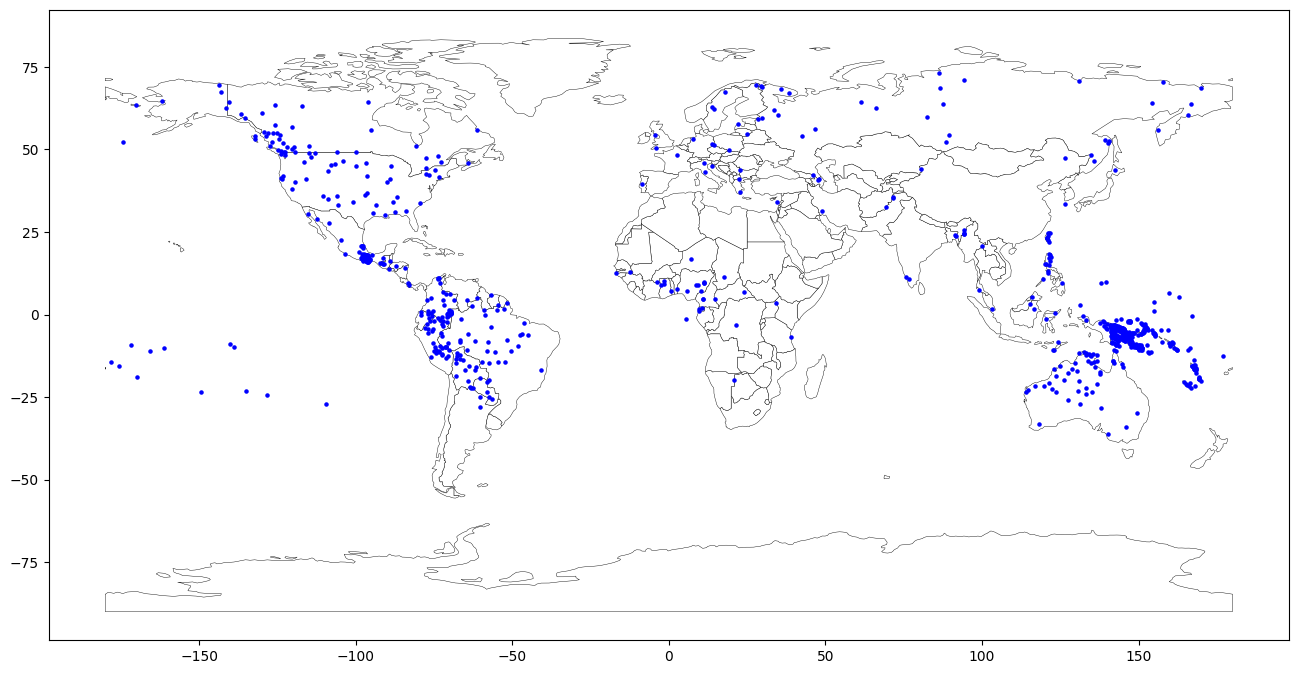

In [89]:
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="white", edgecolor = 'black',ax=ax, linewidth=0.3)
gdb.plot(ax=ax, color = 'blue', markersize = 5)
plt.show()

In [90]:
gdb

,name,glottocode,level,latitude,longitude,geometry,x,y
25,Abau,abau1245,language,-3.97222,141.3240,POINT (141.32400 -3.97222),141.3240,-3.97222
38,Abenlen Ayta,aben1249,language,15.41310,120.2000,POINT (120.20000 15.41310),120.2000,15.41310
65,Abun,abun1252,language,-0.57073,132.4160,POINT (132.41600 -0.57073),132.4160,-0.57073
81,Achagua,acha1250,language,4.38649,-72.2005,POINT (-72.20050 4.38649),-72.2005,4.38649
83,Aché,ache1246,language,-25.58650,-56.4697,POINT (-56.46970 -25.58650),-56.4697,-25.58650
...,...,...,...,...,...,...,...,...
21811,Záparo,zapa1253,language,-1.99871,-76.3640,POINT (-76.36400 -1.99871),-76.3640,-1.99871
21818,Zaramo,zara1247,language,-6.87705,38.9258,POINT (38.92580 -6.87705),38.9258,-6.87705
21871,Zia,ziaa1250,language,-7.95814,147.5790,POINT (147.57900 -7.95814),147.5790,-7.95814
21920,Zoogocho Zapotec,zoog1238,language,17.20160,-96.3433,POINT (-96.34330 17.20160),-96.3433,17.20160
